100%|██████████| 170M/170M [00:02<00:00, 80.3MB/s]


Extracting ../data-unversioned/p1ch6/cifar-10-python.tar.gz to ../data-unversioned/p1ch6/
Files already downloaded and verified


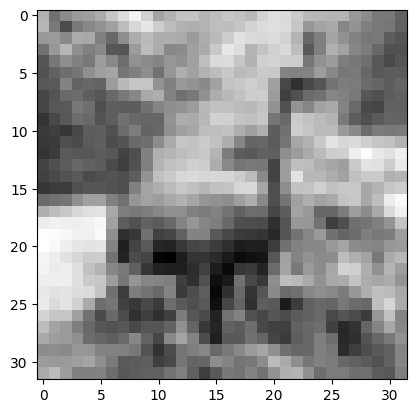

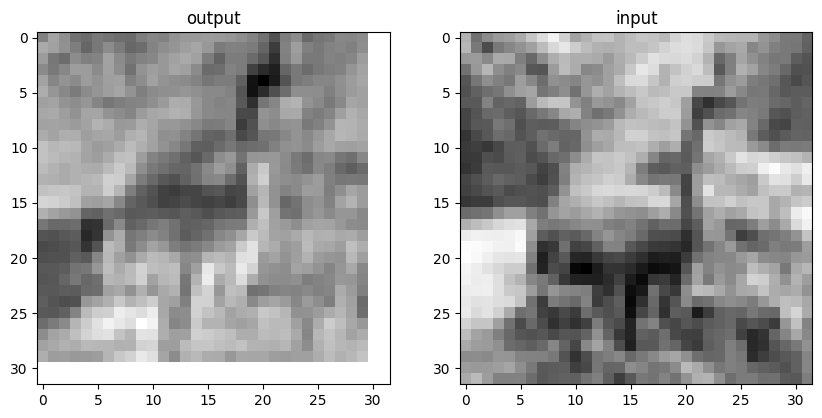

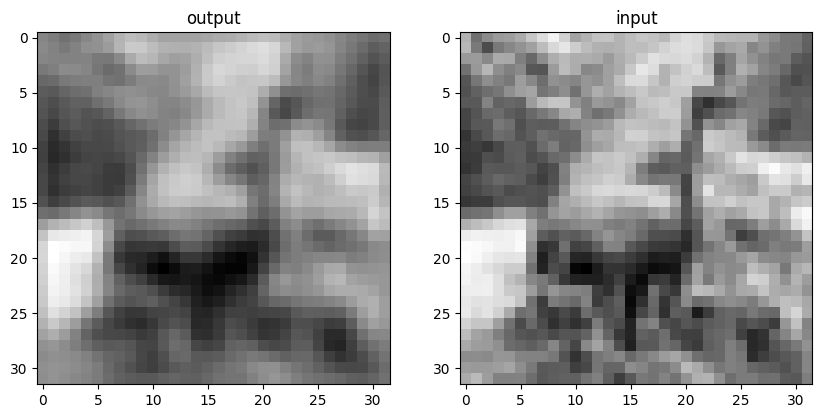

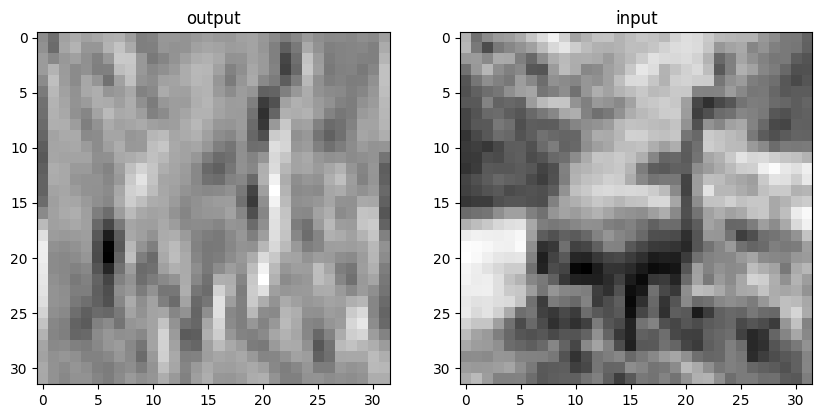

Training on device cuda.


100%|██████████| 170M/170M [00:03<00:00, 56.7MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
2024-12-07 20:50:39.847849 Epoch 1, Training Loss: 1.4970, 
2024-12-07 20:51:02.957764 Epoch 2, Training Loss: 1.0342, 
2024-12-07 20:51:25.158494 Epoch 3, Training Loss: 0.8382, 
2024-12-07 20:51:47.494066 Epoch 4, Training Loss: 0.7133, 
2024-12-07 20:52:08.990999 Epoch 5, Training Loss: 0.6122, 
2024-12-07 20:52:31.825003 Epoch 6, Training Loss: 0.5258, 
2024-12-07 20:52:53.770915 Epoch 7, Training Loss: 0.4506, 
2024-12-07 20:53:16.140035 Epoch 8, Training Loss: 0.3953, 
2024-12-07 20:53:37.728923 Epoch 9, Training Loss: 0.3319, 
2024-12-07 20:53:59.864304 Epoch 10, Training Loss: 0.2907, 
2024-12-07 20:54:22.303041 Epoch 11, Training Loss: 0.2471, 
2024-12-07 20:54:44.720785 Epoch 12, Training Loss: 0.2229, 
2024-12-07 20:55:06.137361 Epoch 13, Training Loss: 0.1884, 
2024-12-07 20:55:32.452363 Epoch 14, Training Loss: 0.1725, 
2024-12-07 20:55:54.438075 Epoch 15, Training Loss: 0.1573, 
2024-

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

numel_list = [p.numel()
              for p in connected_model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

conv = nn.Conv2d(3, 16, kernel_size=3) # <1>
conv

conv.weight.shape, conv.bias.shape

img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

plt.imshow(img.mean(0), cmap='gray')
plt.show()

plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F2_PyTorch.png')  # bookskip
plt.show()

conv = nn.Conv2d(3, 1, kernel_size=3, padding=1) # <1>
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F4_PyTorch.png')  # bookskip
plt.show()

conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),  # First convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Conv2d(16, 8, kernel_size=3, padding=1),  # Second convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Flatten(),  # Flatten layer (converts 4D tensor to 2D tensor)
    nn.Linear(8 * 8 * 8, 32),  # Fully connected layer
    nn.Tanh(),  # Activation
    nn.Linear(32, 2)  # Final output layer for 2 classes
)

model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),  # First convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Conv2d(16, 8, kernel_size=3, padding=1),  # Second convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Flatten(),  # Flatten layer
    nn.Linear(8 * 8 * 8, 32),  # Fully connected layer
    nn.Tanh(),  # Activation
    nn.Linear(32, 10)  # Final output layer for 10 classes
)

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

model(img.unsqueeze(0))

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)  # Pooling layer
        self.fc1 = nn.Linear(8 * 8 * 8, 32)  # Adjusted input size
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        # Convolutional layers with pooling
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))

        # Flatten the output for the linear layer
        x = x.view(x.size(0), -1)  # Flatten the tensor

        # Fully connected layers
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Test the model with an input image
img, _ = cifar2[0]  # Use a sample image from cifar2
model(img.unsqueeze(0))  # Ensure the dimensions align


numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
model = Net()
model(img.unsqueeze(0))


from torch.utils.data import DataLoader
import datetime

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# Prepare CIFAR-10 Dataset
data_path = './data'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])

cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

train_loader = DataLoader(cifar10_train, batch_size=64, shuffle=True)
val_loader = DataLoader(cifar10_val, batch_size=64, shuffle=False)

# Define CNN Model
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super(CIFAR10CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

model = CIFAR10CNN().to(device)

# Define Loss Function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
import time  # Import for tracking time
import datetime  # For timestamps

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
    total_start_time = time.time()  # Start total timer

    for epoch in range(1, n_epochs + 1):
        start_time = time.time()  # Start timer for the epoch
        model.train()  # Set model to training mode
        loss_train = 0.0
        correct_train = 0
        total_train = 0

        # Training loop
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)  # Move data to device
            optimizer.zero_grad()  # Reset gradients
            outputs = model(imgs)  # Forward pass
            loss = loss_fn(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            loss_train += loss.item()  # Accumulate loss

            # Compute training accuracy
            _, predicted = torch.max(outputs, dim=1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_acc = correct_train / total_train  # Training accuracy

        # Validation loop to compute validation accuracy
        model.eval()  # Set model to evaluation mode
        correct_val = 0
        total_val = 0
        with torch.no_grad():  # No gradient computation for validation
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_acc = correct_val / total_val  # Validation accuracy

        end_time = time.time()  # End timer for the epoch
        epoch_time = end_time - start_time  # Compute epoch time

        # Print metrics for the current epoch
        print(f"{datetime.datetime.now()} Epoch {epoch}, "
              f"Training Loss: {loss_train / len(train_loader):.4f}, ")

    # Total time and final metrics
    total_end_time = time.time()  # End total timer
    total_time = total_end_time - total_start_time
    print(f"\nTraining completed in {total_time / 60:.2f} minutes.")
    print(f"Final Training Accuracy (last epoch): {train_acc:.4f}")
    print(f"Final Validation Accuracy (last epoch): {val_acc:.4f}")


# Train the model
training_loop(
    n_epochs=200,  # Set number of epochs
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
)

Files already downloaded and verified
Files already downloaded and verified


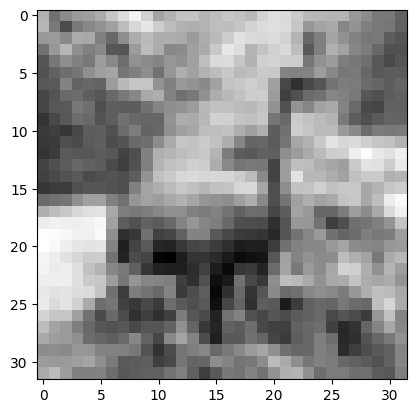

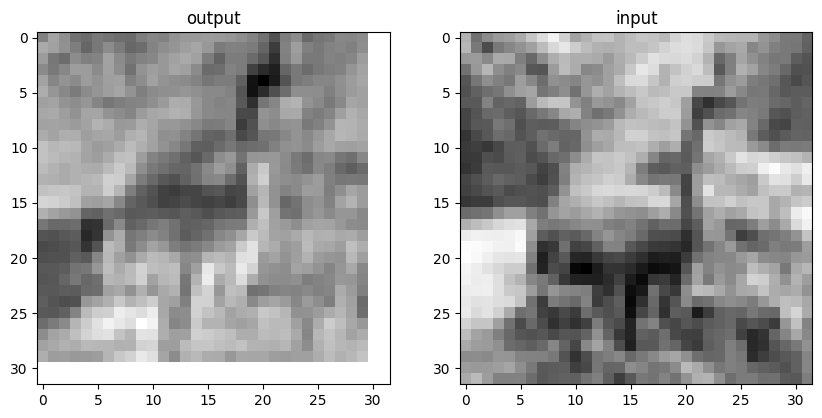

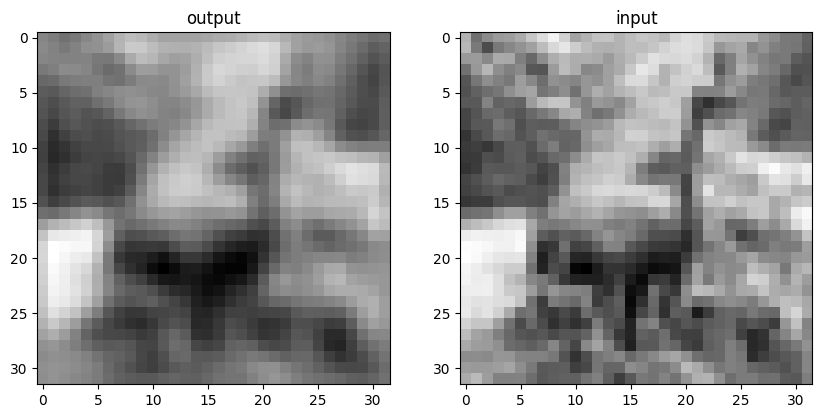

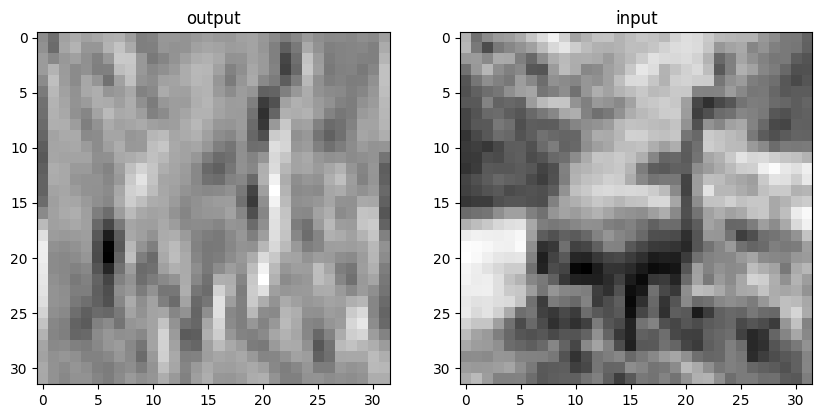

Training on device cuda.
Files already downloaded and verified
Files already downloaded and verified
2024-12-07 22:25:34.301572 Epoch 1, Training Loss: 1.5021, 
2024-12-07 22:25:56.220137 Epoch 2, Training Loss: 1.0353, 
2024-12-07 22:26:18.244870 Epoch 3, Training Loss: 0.8384, 
2024-12-07 22:26:40.458849 Epoch 4, Training Loss: 0.7098, 
2024-12-07 22:27:03.497723 Epoch 5, Training Loss: 0.6091, 
2024-12-07 22:27:25.500235 Epoch 6, Training Loss: 0.5242, 
2024-12-07 22:27:47.178543 Epoch 7, Training Loss: 0.4526, 
2024-12-07 22:28:09.456629 Epoch 8, Training Loss: 0.3868, 
2024-12-07 22:28:31.812436 Epoch 9, Training Loss: 0.3285, 
2024-12-07 22:28:53.689609 Epoch 10, Training Loss: 0.2896, 
2024-12-07 22:29:15.534234 Epoch 11, Training Loss: 0.2472, 
2024-12-07 22:29:38.645309 Epoch 12, Training Loss: 0.2159, 
2024-12-07 22:30:00.969518 Epoch 13, Training Loss: 0.1953, 
2024-12-07 22:30:23.543857 Epoch 14, Training Loss: 0.1746, 
2024-12-07 22:30:45.420316 Epoch 15, Training Loss: 0.

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

numel_list = [p.numel()
              for p in connected_model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

conv = nn.Conv2d(3, 16, kernel_size=3) # <1>
conv

conv.weight.shape, conv.bias.shape

img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

plt.imshow(img.mean(0), cmap='gray')
plt.show()

plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F2_PyTorch.png')  # bookskip
plt.show()

conv = nn.Conv2d(3, 1, kernel_size=3, padding=1) # <1>
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F4_PyTorch.png')  # bookskip
plt.show()

conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),  # First convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Conv2d(16, 8, kernel_size=3, padding=1),  # Second convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Flatten(),  # Flatten layer (converts 4D tensor to 2D tensor)
    nn.Linear(8 * 8 * 8, 32),  # Fully connected layer
    nn.Tanh(),  # Activation
    nn.Linear(32, 2)  # Final output layer for 2 classes
)

model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),  # First convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Conv2d(16, 8, kernel_size=3, padding=1),  # Second convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Flatten(),  # Flatten layer
    nn.Linear(8 * 8 * 8, 32),  # Fully connected layer
    nn.Tanh(),  # Activation
    nn.Linear(32, 10)  # Final output layer for 10 classes
)

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

model(img.unsqueeze(0))

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)  # Pooling layer
        self.fc1 = nn.Linear(8 * 8 * 8, 32)  # Adjusted input size
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        # Convolutional layers with pooling
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))

        # Flatten the output for the linear layer
        x = x.view(x.size(0), -1)  # Flatten the tensor

        # Fully connected layers
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Test the model with an input image
img, _ = cifar2[0]  # Use a sample image from cifar2
model(img.unsqueeze(0))  # Ensure the dimensions align


numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
model = Net()
model(img.unsqueeze(0))


from torch.utils.data import DataLoader
import datetime

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# Prepare CIFAR-10 Dataset
data_path = './data'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])

cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

train_loader = DataLoader(cifar10_train, batch_size=64, shuffle=True)
val_loader = DataLoader(cifar10_val, batch_size=64, shuffle=False)

class CIFAR10CNNExtended(nn.Module):
    def __init__(self):
        super(CIFAR10CNNExtended, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # New convolutional layer
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Apply first convolutional block with pooling
        x = self.pool(F.relu(self.conv1(x)))

        # Apply second convolutional block with pooling
        x = self.pool(F.relu(self.conv2(x)))

        # Apply third convolutional block with pooling (new block)
        x = self.pool(F.relu(self.conv3(x)))

        # Flatten the output from convolution layers to feed into fully connected layers
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected layers with ReLU and Dropout for regularization
        x = F.relu(self.fc1(x))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)  # Output layer
        return x

# Create the model
model = CIFAR10CNNExtended().to(device)

# Define Loss Function and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
import time  # Import for tracking time
import datetime  # For timestamps

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader):
    total_start_time = time.time()  # Start total timer

    for epoch in range(1, n_epochs + 1):
        start_time = time.time()  # Start timer for the epoch
        model.train()  # Set model to training mode
        loss_train = 0.0
        correct_train = 0
        total_train = 0

        # Training loop
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)  # Move data to device
            optimizer.zero_grad()  # Reset gradients
            outputs = model(imgs)  # Forward pass
            loss = loss_fn(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            loss_train += loss.item()  # Accumulate loss

            # Compute training accuracy
            _, predicted = torch.max(outputs, dim=1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_acc = correct_train / total_train  # Training accuracy

        # Validation loop to compute validation accuracy
        model.eval()  # Set model to evaluation mode
        correct_val = 0
        total_val = 0
        with torch.no_grad():  # No gradient computation for validation
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_acc = correct_val / total_val  # Validation accuracy

        end_time = time.time()  # End timer for the epoch
        epoch_time = end_time - start_time  # Compute epoch time

        # Print metrics for the current epoch
        print(f"{datetime.datetime.now()} Epoch {epoch}, "
              f"Training Loss: {loss_train / len(train_loader):.4f}, ")

    # Total time and final metrics
    total_end_time = time.time()  # End total timer
    total_time = total_end_time - total_start_time
    print(f"\nTraining completed in {total_time / 60:.2f} minutes.")
    print(f"Final Training Accuracy (last epoch): {train_acc:.4f}")
    print(f"Final Validation Accuracy (last epoch): {val_acc:.4f}")


# Train the model
training_loop(
    n_epochs=200,  # Set number of epochs
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
)

100%|██████████| 170M/170M [00:05<00:00, 34.1MB/s]


Extracting ../data-unversioned/p1ch6/cifar-10-python.tar.gz to ../data-unversioned/p1ch6/
Files already downloaded and verified


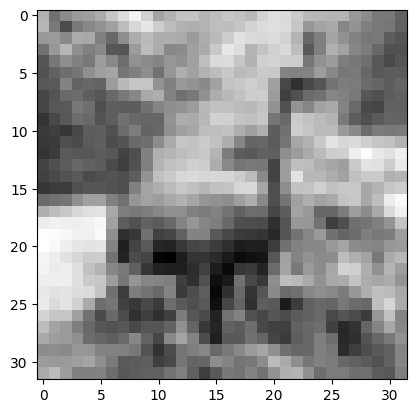

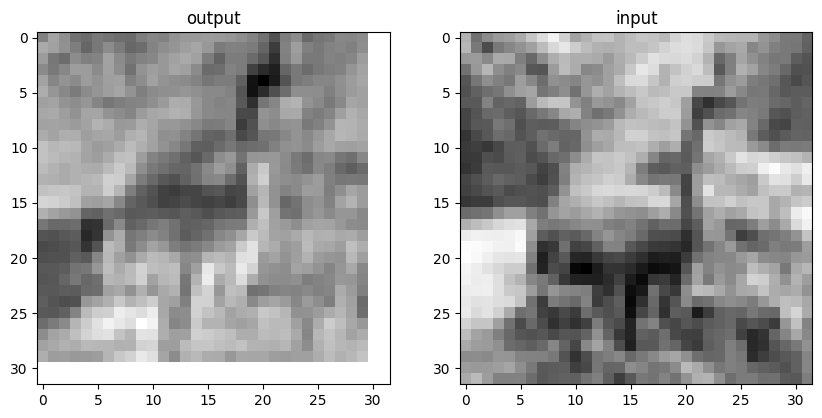

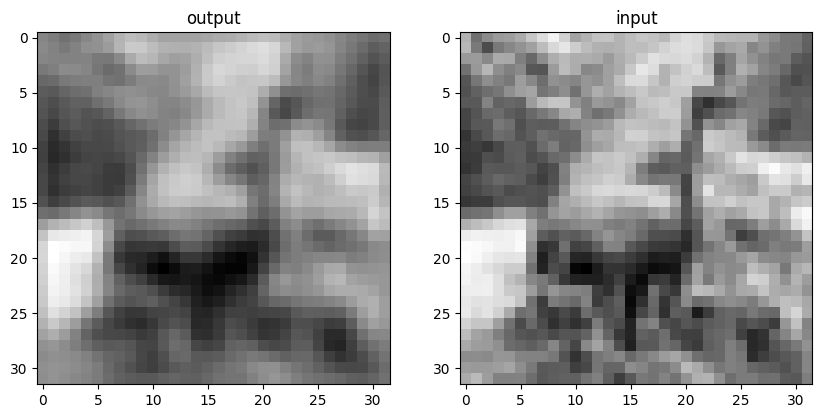

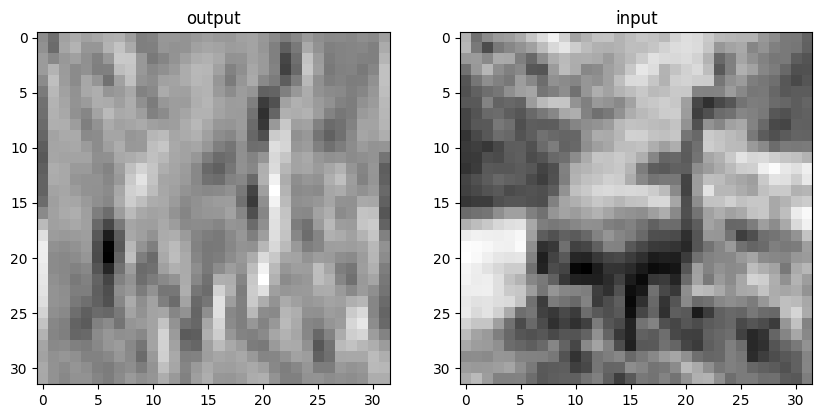

Training on device cuda.


100%|██████████| 170M/170M [00:03<00:00, 49.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1/200, Training Loss: 1.3081
Epoch 2/200, Training Loss: 0.8584
Epoch 3/200, Training Loss: 0.6694
Epoch 4/200, Training Loss: 0.5503
Epoch 5/200, Training Loss: 0.4601
Epoch 6/200, Training Loss: 0.3756
Epoch 7/200, Training Loss: 0.3129
Epoch 8/200, Training Loss: 0.2482
Epoch 9/200, Training Loss: 0.2006
Epoch 10/200, Training Loss: 0.1574
Epoch 11/200, Training Loss: 0.1385
Epoch 12/200, Training Loss: 0.1167
Epoch 13/200, Training Loss: 0.0975
Epoch 14/200, Training Loss: 0.0900
Epoch 15/200, Training Loss: 0.0794
Epoch 16/200, Training Loss: 0.0688
Epoch 17/200, Training Loss: 0.0706
Epoch 18/200, Training Loss: 0.0647
Epoch 19/200, Training Loss: 0.0593
Epoch 20/200, Training Loss: 0.0552
Epoch 21/200, Training Loss: 0.0547
Epoch 22/200, Training Loss: 0.0553
Epoch 23/200, Training Loss: 0.0434
Epoch 24/200, Training Loss: 0.0513
Epoch 25/200, Training Loss: 0.0427
Epoch 26/200, Traini

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch6/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

connected_model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

numel_list = [p.numel()
              for p in connected_model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

first_model = nn.Sequential(
                nn.Linear(3072, 512),
                nn.Tanh(),
                nn.Linear(512, 2),
                nn.LogSoftmax(dim=1))
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

conv = nn.Conv2d(3, 16, kernel_size=3) # <1>
conv

conv.weight.shape, conv.bias.shape

img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

plt.imshow(img.mean(0), cmap='gray')
plt.show()

plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F2_PyTorch.png')  # bookskip
plt.show()

conv = nn.Conv2d(3, 1, kernel_size=3, padding=1) # <1>
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

with torch.no_grad():
    conv.bias.zero_()

with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F4_PyTorch.png')  # bookskip
plt.show()

conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))  # bookskip
ax1 = plt.subplot(1, 2, 1)   # bookskip
plt.title('output')   # bookskip
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)  # bookskip
plt.imshow(img.mean(0), cmap='gray')  # bookskip
plt.title('input')  # bookskip
plt.savefig('Ch8_F5_PyTorch.png')  # bookskip
plt.show()

pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),  # First convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Conv2d(16, 8, kernel_size=3, padding=1),  # Second convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Flatten(),  # Flatten layer (converts 4D tensor to 2D tensor)
    nn.Linear(8 * 8 * 8, 32),  # Fully connected layer
    nn.Tanh(),  # Activation
    nn.Linear(32, 2)  # Final output layer for 2 classes
)

model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding=1),  # First convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Conv2d(16, 8, kernel_size=3, padding=1),  # Second convolutional layer
    nn.Tanh(),  # Activation
    nn.MaxPool2d(2),  # Pooling layer
    nn.Flatten(),  # Flatten layer
    nn.Linear(8 * 8 * 8, 32),  # Fully connected layer
    nn.Tanh(),  # Activation
    nn.Linear(32, 10)  # Final output layer for 10 classes
)

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

model(img.unsqueeze(0))

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)  # Pooling layer
        self.fc1 = nn.Linear(8 * 8 * 8, 32)  # Adjusted input size
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        # Convolutional layers with pooling
        x = self.pool(F.tanh(self.conv1(x)))
        x = self.pool(F.tanh(self.conv2(x)))

        # Flatten the output for the linear layer
        x = x.view(x.size(0), -1)  # Flatten the tensor

        # Fully connected layers
        x = F.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

model = Net()

# Test the model with an input image
img, _ = cifar2[0]  # Use a sample image from cifar2
model(img.unsqueeze(0))  # Ensure the dimensions align


numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
model = Net()
model(img.unsqueeze(0))


from torch.utils.data import DataLoader
import datetime

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Training on device {device}.")

# Prepare CIFAR-10 Dataset
data_path = './data'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])

cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

train_loader = DataLoader(cifar10_train, batch_size=64, shuffle=True)
val_loader = DataLoader(cifar10_val, batch_size=64, shuffle=False)

import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a basic residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Skip connection (downsample if stride > 1)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))  # First convolution
        out = self.bn2(self.conv2(out))  # Second convolution
        out += self.shortcut(x)  # Add the shortcut connection
        out = F.relu(out)  # Final ReLU activation
        return out

# Define the ResNet-10 model
class ResNet10(nn.Module):
    def __init__(self):
        super(ResNet10, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # Initial convolution layer
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(16, 16, 2)  # 2 blocks with 16 channels
        self.layer2 = self._make_layer(16, 32, 2, stride=2)  # 2 blocks with 32 channels, stride=2
        self.layer3 = self._make_layer(32, 64, 2, stride=2)  # 2 blocks with 64 channels, stride=2
        self.layer4 = self._make_layer(64, 128, 2, stride=2)  # 2 blocks with 128 channels, stride=2

        self.fc = nn.Linear(128, 10)  # Final fully connected layer for 10 classes

    # Helper function to create a series of residual blocks
    def _make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))  # Initial convolution
        x = self.layer1(x)  # First set of residual blocks
        x = self.layer2(x)  # Second set of residual blocks
        x = self.layer3(x)  # Third set of residual blocks
        x = self.layer4(x)  # Fourth set of residual blocks
        x = F.adaptive_avg_pool2d(x, (1, 1))  # Global average pooling
        x = torch.flatten(x, 1)  # Flatten the output for the fully connected layer
        x = self.fc(x)  # Fully connected layer (output 10 classes)
        return x

# Ensure model and inputs are on the same device (GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNet10().to(device)  # Move model to the device

import time

# Define the training loop to show loss and accuracy at the end of each epoch
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, val_loader, device):
    # Variables to track loss and accuracy
    train_loss_list = []
    val_loss_list = []
    train_acc_list = []
    val_acc_list = []

    for epoch in range(n_epochs):
        # Training phase
        model.train()  # Ensure model is in training mode
        correct_train = 0
        total_train = 0
        running_train_loss = 0.0

        for batch_idx, (data, target) in enumerate(train_loader):
            # Move data and targets to the device
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()  # Zero the gradients
            output = model(data)  # Forward pass
            loss = loss_fn(output, target)  # Compute the loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update the model parameters

            # Calculate running training loss and accuracy
            running_train_loss += loss.item()
            _, predicted = output.max(1)
            correct_train += predicted.eq(target).sum().item()
            total_train += target.size(0)

        # Calculate and store training loss and accuracy for the epoch
        train_loss = running_train_loss / len(train_loader)  # Average loss
        train_acc = correct_train / total_train
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)

        # Validation phase
        model.eval()  # Switch model to evaluation mode
        correct_val = 0
        total_val = 0
        running_val_loss = 0.0

        with torch.no_grad():  # No need to calculate gradients for validation
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)

                # Calculate running validation loss and accuracy
                loss = loss_fn(output, target)
                running_val_loss += loss.item()
                _, predicted = output.max(1)
                correct_val += predicted.eq(target).sum().item()
                total_val += target.size(0)

        # Calculate and store validation loss and accuracy for the epoch
        val_loss = running_val_loss / len(val_loader)  # Average loss
        val_acc = correct_val / total_val
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc)

        # Print loss and accuracy for the epoch
        print(f"Epoch {epoch+1}/{n_epochs}, Training Loss: {train_loss:.4f}")


    # After training, print the final accuracy and loss
    print("\nFinal Metrics:")
    print(f"Final Training Loss: {train_loss_list[-1]:.4f}")
    print(f"Final Training Accuracy: {train_acc_list[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_acc_list[-1]:.4f}")
# Example to train the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Ensure your data is on the correct device during training
total_start_time = time.time()  # Start total timer
training_loop(
    n_epochs=200,
    optimizer=optimizer,
    model=model,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device
)

# Total time and final metrics
total_end_time = time.time()  # End total timer
total_time = total_end_time - total_start_time
print(f"\nTraining completed in {total_time / 60:.2f} minutes.")


